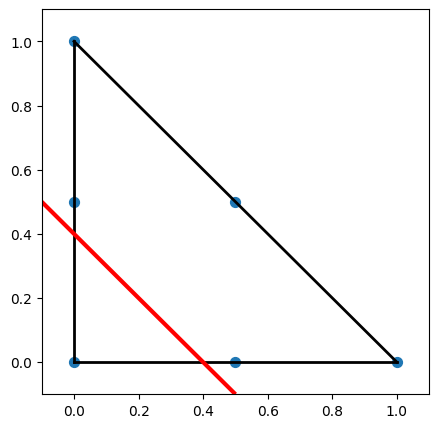

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define level-set function 
def interface_func(x, y):
    return y + x - 0.4
    #return y - 1.2*x + 0.3  

"""
# Example: LINEAR TRIANGLE
ElType = 1
Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]]) 
nedge = 3
"""


# Example: QUADRATIC TRIANGLE
ElType = 1
#Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]]) 
Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
# Calculate midpoints of the edges
midpoints = [(Xe[0] + Xe[1]) / 2,  # Midpoint of edge between vertices 1 and 2
             (Xe[1] + Xe[2]) / 2,  # Midpoint of edge between vertices 2 and 3
             (Xe[2] + Xe[0]) / 2]  # Midpoint of edge between vertices 3 and 1
Xe = np.concatenate((Xe,midpoints), axis=0)
nedge = 3


"""
# Example: CUBIC TRIANGLE
ElType = 1
Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]]) 
# Calculate midpoints of the edges
# Calculate one-third and two-thirds points along the edges
one_third = [(2 * Xe[0] + Xe[1]) / 3,  # One-third point on edge between vertices 1 and 2
             (2 * Xe[1] + Xe[2]) / 3,  # One-third point on edge between vertices 2 and 3
             (2 * Xe[2] + Xe[0]) / 3]  # One-third point on edge between vertices 3 and 1
two_thirds = [(Xe[0] + 2 * Xe[1]) / 3,  # Two-thirds point on edge between vertices 1 and 2
              (Xe[1] + 2 * Xe[2]) / 3,  # Two-thirds point on edge between vertices 2 and 3
              (Xe[2] + 2 * Xe[0]) / 3]  # Two-thirds point on edge between vertices 3 and 1
midpoint = np.array([np.mean(Xe[:,0]), np.mean(Xe[:,1])]).reshape((1,2))
Xe = np.concatenate((Xe,one_third,two_thirds,midpoint), axis=0)
nedge = 3
"""

"""
# Example: LINEAR QUADRILATERAL
ElType = 2
Xe = np.array([[0.0, 0.0], [1.0, -0.2], [1.1, 0.9], [0.3, 1.2]])
nedge = 4
"""

"""
# Example: QUADRATIC QUADRILATERAL
ElType = 2
Xe = np.array([[0.0, 0.0], [1.0, -0.2], [1.1, 0.9], [0.3, 1.2]])
# Calculate midpoints of the edges
midpoints = [(Xe[0] + Xe[1]) / 2,  # Midpoint of edge between vertices 1 and 2
             (Xe[1] + Xe[2]) / 2,  # Midpoint of edge between vertices 2 and 3
             (Xe[2] + Xe[3]) / 2,  # Midpoint of edge between vertices 3 and 4
             (Xe[3] + Xe[0]) / 2]  # Midpoint of edge between vertices 4 and 1
midpoint = np.array([np.mean(Xe[:,0]), np.mean(Xe[:,1])]).reshape((1,2)) 
Xe = np.concatenate((Xe,midpoints,midpoint), axis=0)
nedge = 4
"""

Xmin = np.min(Xe[:,0])-0.1
Xmax = np.max(Xe[:,0])+0.1
Ymin = np.min(Xe[:,1])-0.1
Ymax = np.max(Xe[:,1])+0.1

# Evaluate level-set
xgrid = np.linspace(Xmin,Xmax,30)
ygrid = np.linspace(Ymin,Ymax,30)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid,indexing='ij')
LS = interface_func(Xgrid,Ygrid)

fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.set_xlim(Xmin,Xmax)
axs.set_ylim(Ymin,Ymax)

for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='black', linewidth=2)
axs.scatter(Xe[:,0],Xe[:,1], marker='o', s=50)

axs.contour(Xgrid,Ygrid,LS, levels = [0], colors='red', linewidths = 3)


Intersection Points:
[0.4 0. ]
[0.  0.4]


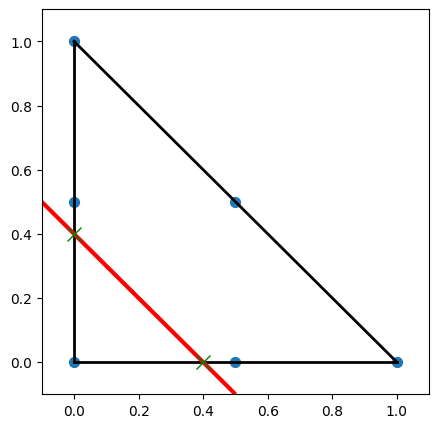

In [22]:
def find_intersection_points(nedge, Xe, LSe):
    intersection_points = []
    intersection_edges = []
    for i in range(nedge):  # Loop through edges of the triangle
        # Check for sign change along the edge
        if LSe[i] * LSe[(i + 1) % nedge] < 0:
            # Store on which edge is located the intersection point
            intersection_edges.append(np.array([i,(i + 1) % nedge]))
            # Interpolate to find intersection point
            t = LSe[i] / (LSe[i] - LSe[(i + 1) % nedge])
            intersection_point = (1 - t) * Xe[i,:] + t * Xe[(i + 1) % nedge,:]
            intersection_points.append(intersection_point)
    return intersection_edges, intersection_points

# Evaluate Level-Set on elemental nodes
LSe = interface_func(Xe[:,0],Xe[:,1])

# Find intersection points
intersection_edges, intersection_points = find_intersection_points(nedge,Xe, LSe)

Xeint = np.zeros([2,2])
Xeint[0,:] = intersection_points[0]
Xeint[1,:] = intersection_points[1]

# Print intersection points
print("Intersection Points:")
for point in intersection_points:
    print(point)
    
fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.set_xlim(Xmin,Xmax)
axs.set_ylim(Ymin,Ymax)

for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='black', linewidth=2)
axs.scatter(Xe[:,0],Xe[:,1], marker='o', s=50)
axs.contour(Xgrid,Ygrid,LS, levels = [0], colors='red', linewidths = 3)
for point in intersection_points:
    axs.plot(point[0],point[1],'x',color='green',markersize=10)

In [23]:
"""# CHECK INTERPOLATION ACCURACY FROM PREVIOUS METHODOLOGY

# ->> IMPOSSIBLE TO INTERPOLATE SECOND ORDER LEVEL-SETS USING LINEAR SHAPE FUNCTIONS OR ASSUMING LINEAR VARIATION IN LEVEL-SET

from scipy import optimize

# Example: LINEAR TRIANGLE
Xe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]]) 
nedge = 3

# Define level-set function 
def interface_func(x, y):
    #return x**2 + y**2 - 0.3 
    return x + y -0.6

LSe = interface_func(Xe[:,0], Xe[:,1])

# LOOK FOR THE NODE WHICH HAS DIFFERENT SIGN...
pospos = np.where(LSe > 0)[0]
posneg = np.where(LSe < 0)[0]
# ... PIVOT COORDINATES MATRIX ACCORDINGLY
if len(pospos) > len(posneg):  # 2 nodal level-set values are positive (outside plasma region)
    pos = np.concatenate((posneg,pospos),axis=0)
    Xe = Xe[pos]
    LSe = LSe[pos]
else: # 2 nodal level-set values are negative (inside plasma region)
    pos = np.concatenate((pospos,posneg),axis=0)
    Xe = Xe[pos]
    LSe = LSe[pos]

# NOW, THE FIRST ROW IN Xe AND FIRST ELEMENT IN LSe CORRESPONDS TO THE NODE ALONE IN ITS RESPECTIVE REGION (INSIDE OR OUTSIDE PLASMA REGION)

# OBTAIN INTERSECTION COORDINATES FOR EACH EDGE:
Xeint = np.zeros([2,2])
for i, edge in enumerate([1,2]):
    if np.abs(Xe[edge,0]-Xe[0,0]) > 1e-8:  # EDGE IS NOT VERTICAL
        # WE DEFINE NOW THE DIFFERENT FUNCTION WE NEED IN ORDER TO BUILD THE TRANSCENDENTAL EQUATION CHARACTERISING THE INTERSECTION BETWEEN
        # THE ELEMENT'S EDGE AND THE LEVEL-SET 0-CONTOUR
        def z(r,Xe,edge):
            # FUNCTION DESCRIBING THE RESTRICCION ASSOCIATED TO THE ELEMENT EDGE
            z = ((Xe[edge,1]-Xe[0,1])*r+Xe[0,1]*Xe[edge,0]-Xe[edge,1]*Xe[0,0])/(Xe[edge,0]-Xe[0,0])
            return z  

        def fun(r,Xe,LSe,edge):
            def N0(r,z,Xe):
                # SHAPE FUNCTION IN PHYSICAL SPACE FOR NODE WHICH IS "ALONE" IN RESPECTIVE REGION (OUTSIDE OR INSIDE PLASMA REGION)
                j = 1
                k = 2
                N = Xe[j,0]*Xe[k,1]-Xe[k,0]*Xe[j,1]+(Xe[j,1]-Xe[k,1])*r+(Xe[k,0]-Xe[j,0])*z
                return N
            def Nedge(r,z,Xe,edge):
                # SHAPE FUNCTION IN PHYSICAL SPACE FOR NODE ALONG THE EDGE FOR WHICH FIND THE INTERSECTION WITH LEVEL-SET 0-CONTOUR
                j = (edge+1)%3
                k = (edge+2)%3
                N = Xe[j,0]*Xe[k,1]-Xe[k,0]*Xe[j,1]+(Xe[j,1]-Xe[k,1])*r+(Xe[k,0]-Xe[j,0])*z
                return N
            
            # TRANSCENDENTAL EQUATION TO SOLVE
            f = N0(r,z(r,Xe,edge),Xe)*LSe[0] + Nedge(r,z(r,Xe,edge),Xe,edge)*LSe[edge]
            return f

        # SOLVE TRANSCENDENTAL EQUATION AND COMPUTE INTERSECTION COORDINATES
        sol = optimize.root(fun, Xe[0,0], args=(Xe,LSe,edge))
        Xeint[i,:] = [sol.x, z(sol.x,Xe,edge)]
        
    else:  # IF THE ELEMENT'S EDGE IS VERTICAL
        r = Xe[0,0] 
        def fun(z,r,Xe,LSe,edge):
            def N0(r,z,Xe):
                # SHAPE FUNCTION IN PHYSICAL SPACE FOR NODE WHICH IS "ALONE" IN RESPECTIVE REGION (OUTSIDE OR INSIDE PLASMA REGION)
                j = 1
                k = 2
                N = Xe[j,0]*Xe[k,1]-Xe[k,0]*Xe[j,1]+(Xe[j,1]-Xe[k,1])*r+(Xe[k,0]-Xe[j,0])*z
                return N
            def Nedge(r,z,Xe,edge):
                # SHAPE FUNCTION IN PHYSICAL SPACE FOR NODE ALONG THE EDGE FOR WHICH FIND THE INTERSECTION WITH LEVEL-SET 0-CONTOUR
                j = (edge+1)%3
                k = (edge+2)%3
                N = Xe[j,0]*Xe[k,1]-Xe[k,0]*Xe[j,1]+(Xe[j,1]-Xe[k,1])*r+(Xe[k,0]-Xe[j,0])*z
                return N
            
            # TRANSCENDENTAL EQUATION TO SOLVE
            f = N0(r,z,Xe)*LSe[0] + Nedge(r,z,Xe,edge)*LSe[edge]
            return f
        
        # SOLVE TRANSCENDENTAL EQUATION AND COMPUTE INTERSECTION COORDINATES
        sol = optimize.root(fun, Xe[0,1], args=(r,Xe,LSe,edge))
        Xeint[i,:] = [r, sol.x]
        
Xmin = np.min(Xe[:,0])-0.1
Xmax = np.max(Xe[:,0])+0.1
Ymin = np.min(Xe[:,1])-0.1
Ymax = np.max(Xe[:,1])+0.1

# Evaluate level-set
xgrid = np.linspace(Xmin,Xmax,30)
ygrid = np.linspace(Ymin,Ymax,30)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid,indexing='ij')
LS = interface_func(Xgrid,Ygrid) 
       
fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.set_xlim(Xmin,Xmax)
axs.set_ylim(Ymin,Ymax)

for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='black', linewidth=2)
axs.scatter(Xe[:,0],Xe[:,1], marker='o', s=50)
axs.contour(Xgrid,Ygrid,LS, levels = [0], colors='red', linewidths = 3)
axs.plot(Xeint[:,0],Xeint[:,1],'x',color='green',markersize=10)"""

'# CHECK INTERPOLATION ACCURACY FROM PREVIOUS METHODOLOGY\n\n# ->> IMPOSSIBLE TO INTERPOLATE SECOND ORDER LEVEL-SETS USING LINEAR SHAPE FUNCTIONS OR ASSUMING LINEAR VARIATION IN LEVEL-SET\n\nfrom scipy import optimize\n\n# Example: LINEAR TRIANGLE\nXe = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 0.8660254]]) \nnedge = 3\n\n# Define level-set function \ndef interface_func(x, y):\n    #return x**2 + y**2 - 0.3 \n    return x + y -0.6\n\nLSe = interface_func(Xe[:,0], Xe[:,1])\n\n# LOOK FOR THE NODE WHICH HAS DIFFERENT SIGN...\npospos = np.where(LSe > 0)[0]\nposneg = np.where(LSe < 0)[0]\n# ... PIVOT COORDINATES MATRIX ACCORDINGLY\nif len(pospos) > len(posneg):  # 2 nodal level-set values are positive (outside plasma region)\n    pos = np.concatenate((posneg,pospos),axis=0)\n    Xe = Xe[pos]\n    LSe = LSe[pos]\nelse: # 2 nodal level-set values are negative (inside plasma region)\n    pos = np.concatenate((pospos,posneg),axis=0)\n    Xe = Xe[pos]\n    LSe = LSe[pos]\n\n# NOW, THE FIRST ROW IN

In [24]:
print(ElType)
print(Xe)
print(Xeint)
print(intersection_edges)
print(LSe)

1
[[0.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0.5]]
[[0.4 0. ]
 [0.  0.4]]
[array([0, 1]), array([2, 0])]
[-0.4  0.6  0.6  0.1  0.6  0.1]


common node =  0
edge nodes =  [1 2]
distances =  [0.6 0.6]


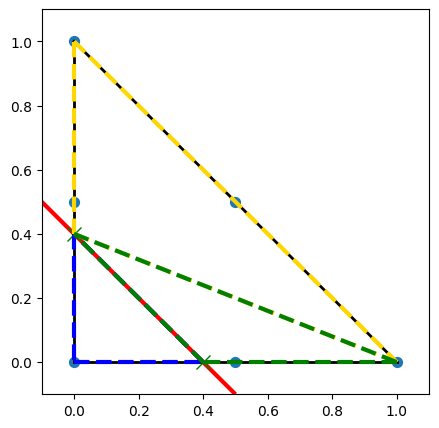

In [30]:
def Tessellate(ElType, Xe, Xeint, intersection_edges, LSe):
    
    if ElType == 1:  # TRIANGULAR ELEMENT
        # MODIFIED NODAL MATRIX AND CONECTIVITIES, ACCOUNTING FOR 3 SUBTRIANGLES 
        XeTESS = np.concatenate((Xe[:3,:],Xeint),axis=0)
        TeTESS = np.zeros([3,3],dtype=int)
        
        # LOOK FOR COMMON NODE BY USING SIGN OF prod(LSe)
        #  -> IF prod(LSe) > 0, THEN COMMON NODE HAS LS > 0
        #  -> IF prod(LSe) < 0, THEN COMMON NODE HAS LS < 0
        for ivertex in range(3):
            if np.sign(LSe[ivertex]) == np.sign(np.prod(LSe[:3])):
                commonnode = ivertex
                break
        edgenode = np.zeros([2],dtype=int)
        distance = np.zeros([2])
        for iedge, edge in enumerate(intersection_edges):
            for node in edge:
                if node != commonnode:
                    edgenode[iedge] = node
                    distance[iedge] = np.linalg.norm(Xe[node,:]-Xeint[iedge,:])
                    
        print("common node = ", commonnode)
        print("edge nodes = ", edgenode)
        print("distances = ", distance)
        
        TeTESS[0,:] = [commonnode, 3,4]  # SUBELEMEMENT WITH COMMON NODE
        if distance[0] < distance[1]:
            TeTESS[1,:] = [edgenode[0],edgenode[1],3]
            TeTESS[2,:] = [edgenode[1],3,4]
        if distance[0] >= distance[1]:
            TeTESS[1,:] = [edgenode[1],edgenode[0],4]
            TeTESS[2,:] = [edgenode[0],3,4]
        
    elif ElType == 2:  # QUADRILATERAL ELEMENT
        # MODIFIED NODAL MATRIX
        XeTESS = np.concatenate((Xe[:4,:],Xeint),axis=0)
        # LOOK FOR TESSELLATION CONFIGURATION BY USING SIGN OF prod(LSe)
        #  -> IF prod(LSe) > 0, THEN CUT SPLITS PARENT QUADRILATERAL ELEMENT INTO 2 CHILD QUADRILATERAL ELEMENTS LS > 0
        #  -> IF prod(LSe) < 0, THEN CUT SPLITS PARENT QUADRILATERAL ELEMENT INTO PENTAGON AND TRIANGLE
        if np.prod(LSe[:4]) > 0:
            # MODIFIED CONECTIVITIES, ACCOUNTING FOR 2 SUBQUADRILATERALS
            TeTESS = np.zeros([2,4],dtype=int)
            nodepositive = []
            nodenegative = []
            for iedge, edge in enumerate(intersection_edges):
                for node in edge:
                    if LSe[node] > 0:
                        nodepositive.append(node)
                    else:
                        nodenegative.append(node)
            TeTESS[0,:] = np.concatenate((np.array([4]),np.array(nodepositive),np.array([5])),axis=0)
            TeTESS[1,:] = np.concatenate((np.array([4]),np.array(nodenegative),np.array([5])),axis=0)
        else:
            # MODIFIED CONECTIVITIES, ACCOUNTING FOR 4 SUBTRIANGLES
            TeTESS = np.zeros([4,3],dtype=int)
            # LOOK FOR DIFFERENT LS SIGN VERTEX NODE
            if len(np.where(LSe[:4]<0)[0]) > len(np.where(LSe[:4]>0)[0]):  # if more LSe < 0 than LSe > 0 -> DIFFERENT LS SIGN VERTEX IS LS > 0
                for inode in range(4):
                    if LSe[inode] > 0:
                        commonnode = inode
                    if np.isin(inode,np.concatenate((intersection_edges[0],intersection_edges[1]),axis=0)):
                        pass
                    else:
                        oppositenode = inode
            else:  # if less LSe < 0 than LSe > 0 -> DIFFERENT LS SIGN VERTEX IS LS < 0
                for inode in range(4):
                    if LSe[inode] < 0:
                        commonnode = inode
                    if np.isin(inode,np.concatenate((intersection_edges[0],intersection_edges[1]),axis=0)):
                        pass
                    else:
                        oppositenode = inode
            edgenode = np.zeros([2],dtype=int)
            for iedge, edge in enumerate(intersection_edges):
                for node in edge:
                    if node != commonnode:
                        edgenode[iedge] = node
                
            TeTESS[0,:] = [commonnode,4,5]
            TeTESS[1,:] = [4,edgenode[0],oppositenode]
            TeTESS[2,:] = [5,edgenode[1],oppositenode]
            TeTESS[3,:] = [4,5,oppositenode]
    
    return XeTESS, TeTESS

XeTESS, TeTESS = Tessellate(ElType,Xe,Xeint,intersection_edges,LSe)

fig, axs = plt.subplots(1, 1, figsize=(5,5))
axs.set_xlim(Xmin,Xmax)
axs.set_ylim(Ymin,Ymax)

for iedge in range(nedge):
    axs.plot([Xe[iedge,0],Xe[int((iedge+1)%nedge),0]],[Xe[iedge,1],Xe[int((iedge+1)%nedge),1]], color='black', linewidth=2)
axs.scatter(Xe[:,0],Xe[:,1], marker='o', s=50)
axs.contour(Xgrid,Ygrid,LS, levels = [0], colors='red', linewidths = 3)
for point in intersection_points:
    axs.plot(point[0],point[1],'x',color='green',markersize=10)

nedgesub = len(TeTESS[0,:])

colorlist = ['blue','gold','green','purple']
for isub in range(len(TeTESS[:,0])):
    for iedge in range(nedgesub):
        axs.plot([XeTESS[TeTESS[isub,iedge],0],XeTESS[TeTESS[isub,int((iedge+1)%nedgesub)],0]],[XeTESS[TeTESS[isub,iedge],1],XeTESS[TeTESS[isub,int((iedge+1)%nedgesub)],1]], linestyle='--',color=colorlist[isub], linewidth=3)
    


In [31]:
intersection_edges
#TeTESS

[array([0, 1]), array([2, 0])]